# Air Quality Data Analysis

## Objectives
- Analyze air quality index (AQI) values (Ozone, PM25, CO, PM10, NO2)
- Extract and interpret some of the trends found in the data

## Dataset
This dataset contains information about air quality compiled for the year of 2023 from the Environmenetal Protection Agency.
https://www.kaggle.com/datasets/nikkiperry/2023-air-quality-data-for-cbsas/data

### Schema
- Unnamed: 0
- Date
- Overall AQI Value
- Main Pollutant
- Site Name (of Overall AQI)
- Site ID (of Overall AQI)
- Source (of Overall AQI)
- Ozone
- PM25
- CO
- PM10
- NO2
- AQI category (good, moderate, unhealthy for sensitive groups, unhealthy, very unhealthy, hazardous)
- city
- state


## Import libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

## Read in and explore the dataset

In [44]:
airquality = pd.read_csv(
    'aqidataset.csv', 
    parse_dates=['Date'], 
)
airquality.head()

,Unnamed: 0,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
0,0,2023-01-01,28,Ozone,Connecticut Hill,36-109-9991,AQS,28,.,NaN,NaN,NaN,Good,Ithaca,NY
1,1,2023-01-02,26,Ozone,Connecticut Hill,36-109-9991,AQS,26,.,NaN,NaN,NaN,Good,Ithaca,NY
2,2,2023-01-03,21,Ozone,Connecticut Hill,36-109-9991,AQS,21,.,NaN,NaN,NaN,Good,Ithaca,NY
3,3,2023-01-04,25,Ozone,Connecticut Hill,36-109-9991,AQS,25,.,NaN,NaN,NaN,Good,Ithaca,NY
4,4,2023-01-05,31,Ozone,Connecticut Hill,36-109-9991,AQS,31,.,NaN,NaN,NaN,Good,Ithaca,NY


First we sort the dataset by date and see what the date distribution looks like. It appears that the data runs from the beginning of 2023 to the end. There is data collected for each day in 2023 for each city.

In [45]:
airquality.sort_values(["city", 'Date']) # there is a data point for each day for every city 

,Unnamed: 0,Date,Overall AQI Value,Main Pollutant,Site Name (of Overall AQI),Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,PM10,NO2,AQI category,city,state
3277,3277,2023-01-01,15,PM2.5,Board Of Ed. Bldg.,37-021-0034,AQS,.,15,NaN,.,NaN,Good,Asheville,NC
3278,3278,2023-01-02,25,PM2.5,Board Of Ed. Bldg.,37-021-0034,AQS,.,25,NaN,.,NaN,Good,Asheville,NC
3279,3279,2023-01-03,19,PM2.5,Board Of Ed. Bldg.,37-021-0034,AQS,.,19,NaN,.,NaN,Good,Asheville,NC
3280,3280,2023-01-04,1,PM2.5,Board Of Ed. Bldg.,37-021-0034,AQS,.,1,NaN,.,NaN,Good,Asheville,NC
3281,3281,2023-01-05,9,PM2.5,Board Of Ed. Bldg.,37-021-0034,AQS,.,9,NaN,.,NaN,Good,Asheville,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5462,5462,2023-12-27,30,PM2.5,Springfield Near Road Site,51-059-0031,AQS,27,30,6,7,30,Good,Washington,DC
5463,5463,2023-12-28,24,Ozone,James S. Long Park,51-153-0009,AQS,24,18,7,7,23,Good,Washington,DC
5464,5464,2023-12-29,27,Ozone,MCMILLAN NCore-PAMS,11-001-0043,AQS,27,21,7,7,16,Good,Washington,DC
5465,5465,2023-12-30,26,Ozone,RIVER TERRACE,11-001-0041,AQS,26,13,5,5,20,Good,Washington,DC


In [46]:
airquality.info() # a bunch of columns need to have the data type changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  10924 non-null  int64         
 1   Date                        10924 non-null  datetime64[ns]
 2   Overall AQI Value           10924 non-null  int64         
 3   Main Pollutant              10924 non-null  object        
 4   Site Name (of Overall AQI)  10790 non-null  object        
 5   Site ID (of Overall AQI)    10924 non-null  object        
 6   Source (of Overall AQI)     10924 non-null  object        
 7   Ozone                       10575 non-null  object        
 8   PM25                        10924 non-null  object        
 9   CO                          8395 non-null   object        
 10  PM10                        9853 non-null   object        
 11  NO2                         8760 non-null   object    

## Cleaning the data

Within the dataset, there appear to be both null values and values of the form `.` where there should be a numerical value. First, we will investigate the nulls values and decide on a solution, and then we will manipulate the inconsistent value.

In [47]:
# lets look at the unique values for each column

for col in airquality.columns:
    print(
    col, airquality[col].unique(), '\n'
)

Unnamed: 0 [    0     1     2 ... 10921 10922 10923] 

Date <DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00',
 ...
 '2023-12-30 00:00:00', '2023-12-31 00:00:00', '2023-04-01 00:00:00',
 '2023-12-02 00:00:00', '2023-12-03 00:00:00', '2023-12-04 00:00:00',
 '2023-12-05 00:00:00', '2023-12-06 00:00:00', '2023-12-07 00:00:00',
 '2023-12-08 00:00:00']
Length: 365, dtype: datetime64[ns] 

Overall AQI Value [ 28  26  21  25  31  27  29  32  40  38  18  19  30  24  35  36  37  34
  33  44  39  41  45  50  43  47  42  46  58  64  67  74 100  49  51  90
  84  48  97  93  77  80  20  61  54  22  23  17  73  55  52  56  57  76
  66  82  60  53  65  63  69  59 143 119  87  71  83 115 140 108 126 133
 105 129 154 136 101 151  86 107 209 221 163 153 116 192  70 174 166  62
 112  72 103  68  79 125 165  8

### Dropping the null values

First, lets check the distribution of the null and non-null values in the dataset. It seems like the columns `Site Name (of Overall AQI)`, `Ozone`, `CO`, `PM10`, and `NO2` have null values, with `CO` having the largest amount of null values. 

In [48]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  10924 non-null  int64         
 1   Date                        10924 non-null  datetime64[ns]
 2   Overall AQI Value           10924 non-null  int64         
 3   Main Pollutant              10924 non-null  object        
 4   Site Name (of Overall AQI)  10790 non-null  object        
 5   Site ID (of Overall AQI)    10924 non-null  object        
 6   Source (of Overall AQI)     10924 non-null  object        
 7   Ozone                       10575 non-null  object        
 8   PM25                        10924 non-null  object        
 9   CO                          8395 non-null   object        
 10  PM10                        9853 non-null   object        
 11  NO2                         8760 non-null   object    

In [49]:
null_cols = ["Site Name (of Overall AQI)", "Ozone", "CO", "PM10", "NO2"] # the columns with null values

# create a dictionary to clearly see which cities have null values and the proportions
cities_with_nulls = {}

# iterate through, calculate and extract these proportions
for col in null_cols:
    proportions = []
    df = airquality[
        ['city', col]
        ].loc[
            airquality[col].isnull()
        ]
    
    # 
    for city in set(df['city'].tolist()):    
        # % of nulls for each city 
        proportions.append(len(df[df['city'] == city])/len(airquality[airquality['city'] == city])) 
        
    # collect the city names with their pertaining proportions
    cities_with_nulls[col] = (list(set(df['city'].values)), proportions)
cities_with_nulls

{'Site Name (of Overall AQI)': (['Charlotte', 'Boston', 'Denver', 'Portland'],
  [0.09041095890410959,
   0.09041095890410959,
   0.07671232876712329,
   0.1095890410958904]),
 'Ozone': (['Kahului'], [1.0]),
 'CO': (['Ithaca',
   'Madison',
   'Kahului',
   'Chapel Hill',
   'Greensboro',
   'State College',
   'Asheville'],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
 'PM10': (['Ithaca', 'State College', 'Kahului'], [1.0, 1.0, 1.0]),
 'NO2': (['Ithaca',
   'Madison',
   'Kahului',
   'Chapel Hill',
   'Greensboro',
   'Asheville'],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0])}

This dictionary shows us:
- the cities that contain nulls values for the relevant columns: `Site Name (of Overall AQI)`, `Ozone`, `CO`, `PM10`, `NO2`
- the distribution of null values in each column for each city as defined above

Takeaway: 
- The distribution of null values for the column `Site Name (of Overall AQI)` is pretty insignificant, but this is not a very relevant column, so we will go ahead and drop the column. 
- For the column `Ozone`, the city of `Kahului` contains 100% null values
- For the column `CO`, the cities of `Greensboro`, `State College`, `Madison`, `Asheville`, `Chapel Hill`, `Ithaca`, and `Kahului` contain 100% null values
- For the column `PM10`, the cities of `Ithaca`, `Kahului`, and `State College` contain 100% null values
- For the column `NO2`, the cities of `Greensboro`, `Madison`, `Asheville`, `Chapel Hill`, `Ithaca`, and `Kahului` contain 100% null values

In the cases where entire cities contain 100% null values for any one of the columns above, we will drop those cities for the sake of analysis that include all of these columns. In the case of analyzing singular columns and any one of these cities isn't listed as a null city for that column, we will include it. 

Note that `Kahului` has 100% null values for all columns here, except `Site Name (of Overall AQI)`. So we will drop this city except in cases where we look at `Site Name (of Overall AQI)` exclusively.

In [50]:
# dropping Site Name column
airquality = airquality.drop(columns=['Site Name (of Overall AQI)'], inplace=False)

In [51]:
# dropping rows with the condition that the city is in the list of null cities
airquality = airquality.drop(
    airquality[
        airquality['city'].isin(
            ['Kahului', 'Greensboro', 'State College', 'Madison', 'Asheville', 'Chapel Hill', 'Ithaca']
        )
    ].index
)

In [52]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8395 entries, 357 to 10923
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                8395 non-null   int64         
 1   Date                      8395 non-null   datetime64[ns]
 2   Overall AQI Value         8395 non-null   int64         
 3   Main Pollutant            8395 non-null   object        
 4   Site ID (of Overall AQI)  8395 non-null   object        
 5   Source (of Overall AQI)   8395 non-null   object        
 6   Ozone                     8395 non-null   object        
 7   PM25                      8395 non-null   object        
 8   CO                        8395 non-null   object        
 9   PM10                      8395 non-null   object        
 10  NO2                       8395 non-null   object        
 11  AQI category              8395 non-null   object        
 12  city                  

Now our distribution shows that there are no null values

### Replacing inconsistent values 
As mentioned above, there appear to be values of the form `.` within many of the numerical columns. Here we will identify those values and decide if we should use an imputation method, or drop columns/rows.

In [53]:
# percentage of . in each column
for col in airquality.columns:
    print(
        col, 
        len(airquality.loc[airquality[col] == '.'])/len(airquality)
    )

Unnamed: 0 0.0
Date 0.0
Overall AQI Value 0.0
Main Pollutant 0.0
Site ID (of Overall AQI) 0.0
Source (of Overall AQI) 0.0
Ozone 0.0007147111375818939
PM25 0.00035735556879094697
CO 0.010005955926146516
PM10 0.1946396664681358
NO2 0.016081000595592615
AQI category 0.0
city 0.0
state 0.0


In [54]:
# since our analysis will rely on grouping based on city, let us see the distribution of . for each city

In [55]:
def check_inconsistent_vals(df, columns):
    
    for city in set(df['city'].values):
        print('\n', city)
        for pollutant in columns:
            print(pollutant,
                len(
                    df[(df['city'] == city) & (df[pollutant] == '.')]
                )/len(df[df['city']== city])
            )

In [56]:
check_inconsistent_vals(airquality, columns=['Ozone', 'PM25', 'CO', 'PM10', 'NO2'])


 Boston
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.0
NO2 0.0

 Houston
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.0
NO2 0.0

 Philadelphia
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.0
NO2 0.0

 Portland
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.673972602739726
NO2 0.0027397260273972603

 Raleigh
Ozone 0.00821917808219178
PM25 0.0
CO 0.0
PM10 0.0684931506849315
NO2 0.0

 Denver
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.0
NO2 0.0

 Athens
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.0027397260273972603
NO2 0.0

 Washington
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.0
NO2 0.0

 Orlando
Ozone 0.0
PM25 0.00821917808219178
CO 0.22465753424657534
PM10 0.00821917808219178
NO2 0.3643835616438356

 Seattle
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.810958904109589
NO2 0.0

 Richmond
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.010958904109589041
NO2 0.0

 Dallas
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.4054794520547945
NO2 0.0

 Detroit
Ozone 0.005479452054794521
PM25 0.0
CO 0.0
PM10 0.0
NO2 0.0

 Charlotte
Ozone 0.0
PM25 0.0
CO 0.0
PM10 0.0
NO2 0.0

 Minneapolis
Ozone 0.0
PM25 0.0
CO 0.0
PM1

It appears that `PM10` has the highest occurence of `.` for many cities. Other occurences of this value are very minimal (about 1% or under) except for Orlando, which contains about 20-36% of . in 2 different pollutant columns. To handle these inconsistent values, we will:
- drop the `PM10` column since too many values are missing
- drop the city of Orlando
- use an imputation method for the rest of the smaller proportions of `.`

In [57]:
airquality=airquality.drop(columns = 'PM10')
airquality=airquality[airquality['city'] != 'Orlando']

In [58]:
# replace all . values with np.nan for interpolation preparation
airquality = airquality.replace('.', np.nan)

In [59]:
airquality_int = airquality.interpolate(method='linear', limit_direction='forward', axis=0)
airquality_int.head()

,Unnamed: 0,Date,Overall AQI Value,Main Pollutant,Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,NO2,AQI category,city,state
357,357,2023-01-01,74,PM2.5,17-031-4007,AQS,15,74,7,21.0,Moderate,Chicago,IL
358,358,2023-01-02,73,PM2.5,18-089-0036,AQS,19,73,7,28.0,Moderate,Chicago,IL
359,359,2023-01-03,55,PM2.5,18-089-0036,AQS,19,55,6,25.0,Moderate,Chicago,IL
360,360,2023-01-04,37,PM2.5,17-031-0001,AQS,21,37,3,25.0,Good,Chicago,IL
361,361,2023-01-05,54,PM2.5,55-059-0019,AQS,20,54,5,29.0,Moderate,Chicago,IL


In [60]:
#check for nans or .
check_inconsistent_vals(airquality_int, columns=['Ozone', 'PM25', 'CO', 'NO2'])


 Boston
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Houston
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Philadelphia
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Portland
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Raleigh
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Denver
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Athens
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Washington
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Seattle
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Richmond
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Dallas
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Detroit
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Charlotte
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Minneapolis
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Los Angeles
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Chicago
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Cleveland
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Baltimore
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 New York
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Miami
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 San Francisco
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0

 Phoenix
Ozone 0.0
PM25 0.0
CO 0.0
NO2 0.0


### Changing the data type
It looks like the data types of most columns are type `object` and need to be changed to the proper form. The numerical columns `Ozone`, `PM25`, `CO`, `PM10`, and `NO2` will be labeled as floats to account for both integer and decimal values. The columns `Main Pollutant`, `Site Name (of Overall AQI)`, `Site ID (of Overall AQI)`, `Source (of Overall AQI)`, `AQI category`, `city`, `state` will all be string values.

In [61]:
int_values = ["Ozone", "PM25", "CO", "NO2"]
str_values = ["Main Pollutant", "Site ID (of Overall AQI)", 
              "Source (of Overall AQI)", "AQI category", "city", "state"]

In [62]:
# change to floats
for col in int_values:
    airquality[col] = airquality[col].astype("float")

# change to strings
for col in str_values:
    airquality[col] = airquality[col].astype("string")

### Dropping any other unnecessary columns

In [63]:
airquality = airquality.drop(columns = 'Unnamed: 0')

We will also drop any values exceeding 500. This is surpassing the highest limit on the AQI scale and could potentially represent data errors.

In [64]:
airquality = airquality[
    (airquality['Overall AQI Value'] < 500) &
    (airquality['Ozone'] < 500) &
    (airquality['PM25'] < 500) &
    (airquality['CO'] < 500) &
    (airquality['NO2'] < 500) 
]

### Adding any extra columns

Extracting the month from datetime for later use

In [65]:
airquality['month'] = airquality['Date'].dt.month
airquality

,Date,Overall AQI Value,Main Pollutant,Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,NO2,AQI category,city,state,month
357,2023-01-01,74,PM2.5,17-031-4007,AQS,15.0,74.0,7.0,21.0,Moderate,Chicago,IL,1
358,2023-01-02,73,PM2.5,18-089-0036,AQS,19.0,73.0,7.0,28.0,Moderate,Chicago,IL,1
359,2023-01-03,55,PM2.5,18-089-0036,AQS,19.0,55.0,6.0,25.0,Moderate,Chicago,IL,1
360,2023-01-04,37,PM2.5,17-031-0001,AQS,21.0,37.0,3.0,25.0,Good,Chicago,IL,1
361,2023-01-05,54,PM2.5,55-059-0019,AQS,20.0,54.0,5.0,29.0,Moderate,Chicago,IL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10919,2023-12-27,54,PM2.5,53-053-0031,AQS,40.0,54.0,2.0,26.0,Moderate,Seattle,WA,12
10920,2023-12-28,41,PM2.5,53-061-0020,AirNow,40.0,41.0,2.0,28.0,Good,Seattle,WA,12
10921,2023-12-29,41,Ozone,53-053-0012,AQS,41.0,38.0,2.0,30.0,Good,Seattle,WA,12
10922,2023-12-30,42,Ozone,53-053-0012,AQS,42.0,38.0,2.0,25.0,Good,Seattle,WA,12


### Final checks to make sure everything is adequately prepared for analysis and visualization

In [66]:
airquality.head()

,Date,Overall AQI Value,Main Pollutant,Site ID (of Overall AQI),Source (of Overall AQI),Ozone,PM25,CO,NO2,AQI category,city,state,month
357,2023-01-01,74,PM2.5,17-031-4007,AQS,15.0,74.0,7.0,21.0,Moderate,Chicago,IL,1
358,2023-01-02,73,PM2.5,18-089-0036,AQS,19.0,73.0,7.0,28.0,Moderate,Chicago,IL,1
359,2023-01-03,55,PM2.5,18-089-0036,AQS,19.0,55.0,6.0,25.0,Moderate,Chicago,IL,1
360,2023-01-04,37,PM2.5,17-031-0001,AQS,21.0,37.0,3.0,25.0,Good,Chicago,IL,1
361,2023-01-05,54,PM2.5,55-059-0019,AQS,20.0,54.0,5.0,29.0,Moderate,Chicago,IL,1


In [67]:
airquality.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8019 entries, 357 to 10923
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8019 non-null   datetime64[ns]
 1   Overall AQI Value         8019 non-null   int64         
 2   Main Pollutant            8019 non-null   string        
 3   Site ID (of Overall AQI)  8019 non-null   string        
 4   Source (of Overall AQI)   8019 non-null   string        
 5   Ozone                     8019 non-null   float64       
 6   PM25                      8019 non-null   float64       
 7   CO                        8019 non-null   float64       
 8   NO2                       8019 non-null   float64       
 9   AQI category              8019 non-null   string        
 10  city                      8019 non-null   string        
 11  state                     8019 non-null   string        
 12  month                 

Looks good :)

## Which cities are the most critical ones? 

In other words, which cities have reached an `Overall AQI Value` greater than 200 (placing them in the Very Unhealthy and Hazardous AQI levels)?

In [68]:
airquality.describe()

,Date,Overall AQI Value,Ozone,PM25,CO,NO2,month
count,8019,8019.000000,8019.000000,8019.000000,8019.000000,8019.000000,8019.000000
mean,2023-07-01 21:10:28.956229120,57.762813,48.074323,46.196533,7.088540,27.762813,6.522135
min,2023-01-01 00:00:00,17.000000,1.000000,3.000000,1.000000,2.000000,1.000000
25%,2023-04-02 00:00:00,41.000000,33.000000,31.000000,5.000000,20.000000,4.000000
50%,2023-07-02 00:00:00,51.000000,41.000000,44.000000,6.000000,27.000000,7.000000
75%,2023-10-01 00:00:00,65.000000,50.000000,57.000000,8.000000,35.000000,10.000000
max,2023-12-31 00:00:00,290.000000,210.000000,290.000000,76.000000,104.000000,12.000000
std,NaN,27.278226,26.169082,21.592135,4.105814,11.487512,3.445344


In [69]:
# We are grouping by city and taking the MAXIMUM value for each of the pollutant columns
# Why? this will help us extract the cities with occurences of the most dangerous levels of pollutants
airquality_by_city_max = airquality.groupby('city')[
    ['Overall AQI Value', 'Ozone', 'PM25', 'CO', 'NO2']
].max().reset_index()

In [70]:
airquality_by_city_max

,city,Overall AQI Value,Ozone,PM25,CO,NO2
0,Athens,172,172.0,152.0,18.0,56.0
1,Baltimore,205,205.0,187.0,13.0,52.0
2,Boston,136,136.0,114.0,11.0,57.0
3,Charlotte,150,150.0,127.0,20.0,41.0
4,Chicago,221,192.0,221.0,18.0,82.0
5,Cleveland,260,161.0,260.0,73.0,52.0
6,Dallas,177,177.0,157.0,30.0,71.0
7,Denver,172,147.0,172.0,23.0,73.0
8,Detroit,200,159.0,200.0,24.0,88.0
9,Houston,206,206.0,121.0,27.0,67.0


We will extract only the cities we define as critical. By using the `Overall AQI Value`, we will filter through the dataset to take the cities that contain a value above 200. This places the city in either a `Very Unhealthy` or `Hazardous` AQI category.

In [88]:
critical_cities = airquality_by_city_max.sort_values(by='Overall AQI Value', ascending=False)
critical_cities = critical_cities[critical_cities['Overall AQI Value'] > 200]['city'].values

## Visualizations

<Figure size 1170x827 with 0 Axes>

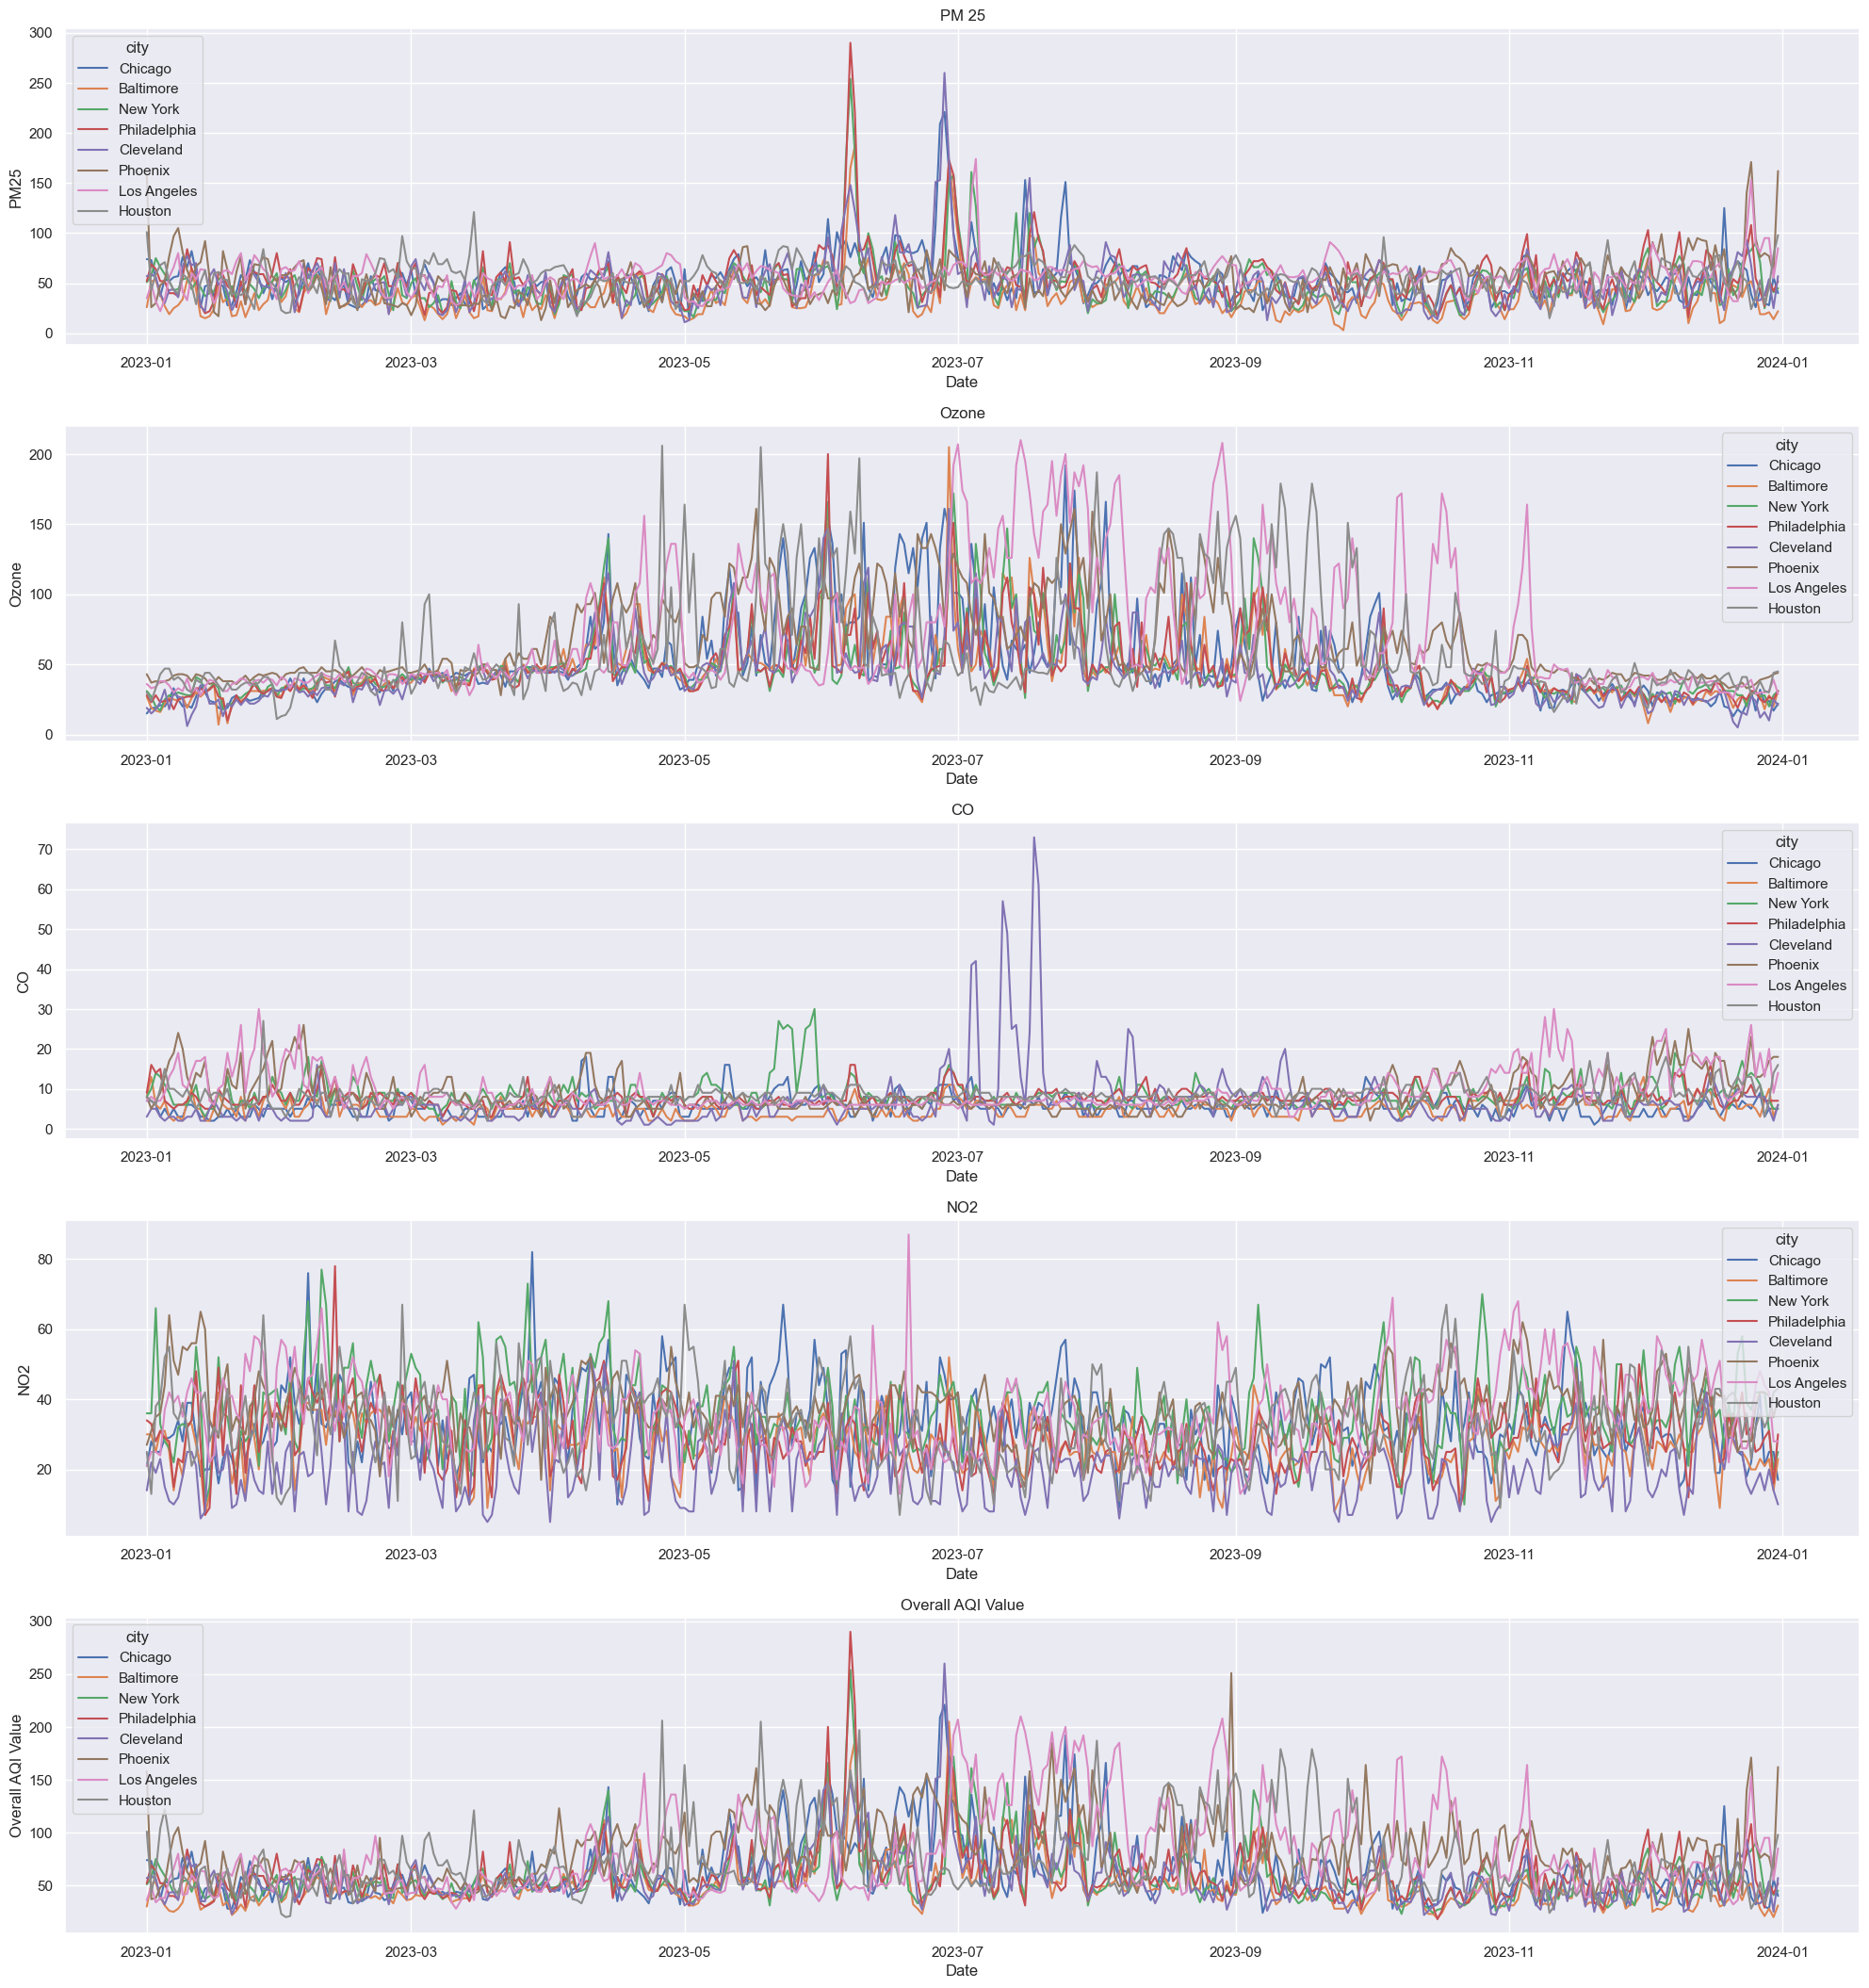

In [89]:
fig = plt.figure()
plt.figure(figsize=(20, 25))

plt.subplot(6, 1, 1)
sns.lineplot(
    data=airquality[airquality['city'].isin(critical_cities)], 
    x='Date', 
    y='PM25', 
    hue='city')
plt.title('PM 25')

plt.subplot(6, 1, 2)
sns.lineplot(
    data=airquality[airquality['city'].isin(critical_cities)], 
    x='Date', 
    y='Ozone', 
    hue='city')
plt.title('Ozone')

plt.subplot(6, 1, 3)
sns.lineplot(
    data=airquality[airquality['city'].isin(critical_cities)], 
    x='Date', 
    y='CO', 
    hue='city')
plt.title('CO')

plt.subplot(6, 1, 4)
sns.lineplot(
    data=airquality[airquality['city'].isin(critical_cities)], 
    x='Date', 
    y='NO2', 
    hue='city')
plt.title('NO2')

plt.subplot(6, 1, 5)
sns.lineplot(
    data=airquality[airquality['city'].isin(critical_cities)], 
    x='Date', 
    y='Overall AQI Value', 
    hue='city')
plt.title('Overall AQI Value')

plt.tight_layout()


plt.show()

In [90]:
airquality.groupby(["AQI category"]).size()

AQI category
Good                              4006
Moderate                          3418
Unhealthy                          119
Unhealthy for Sensitive Groups     463
Very Unhealthy                      13
dtype: int64

<Figure size 1170x827 with 0 Axes>

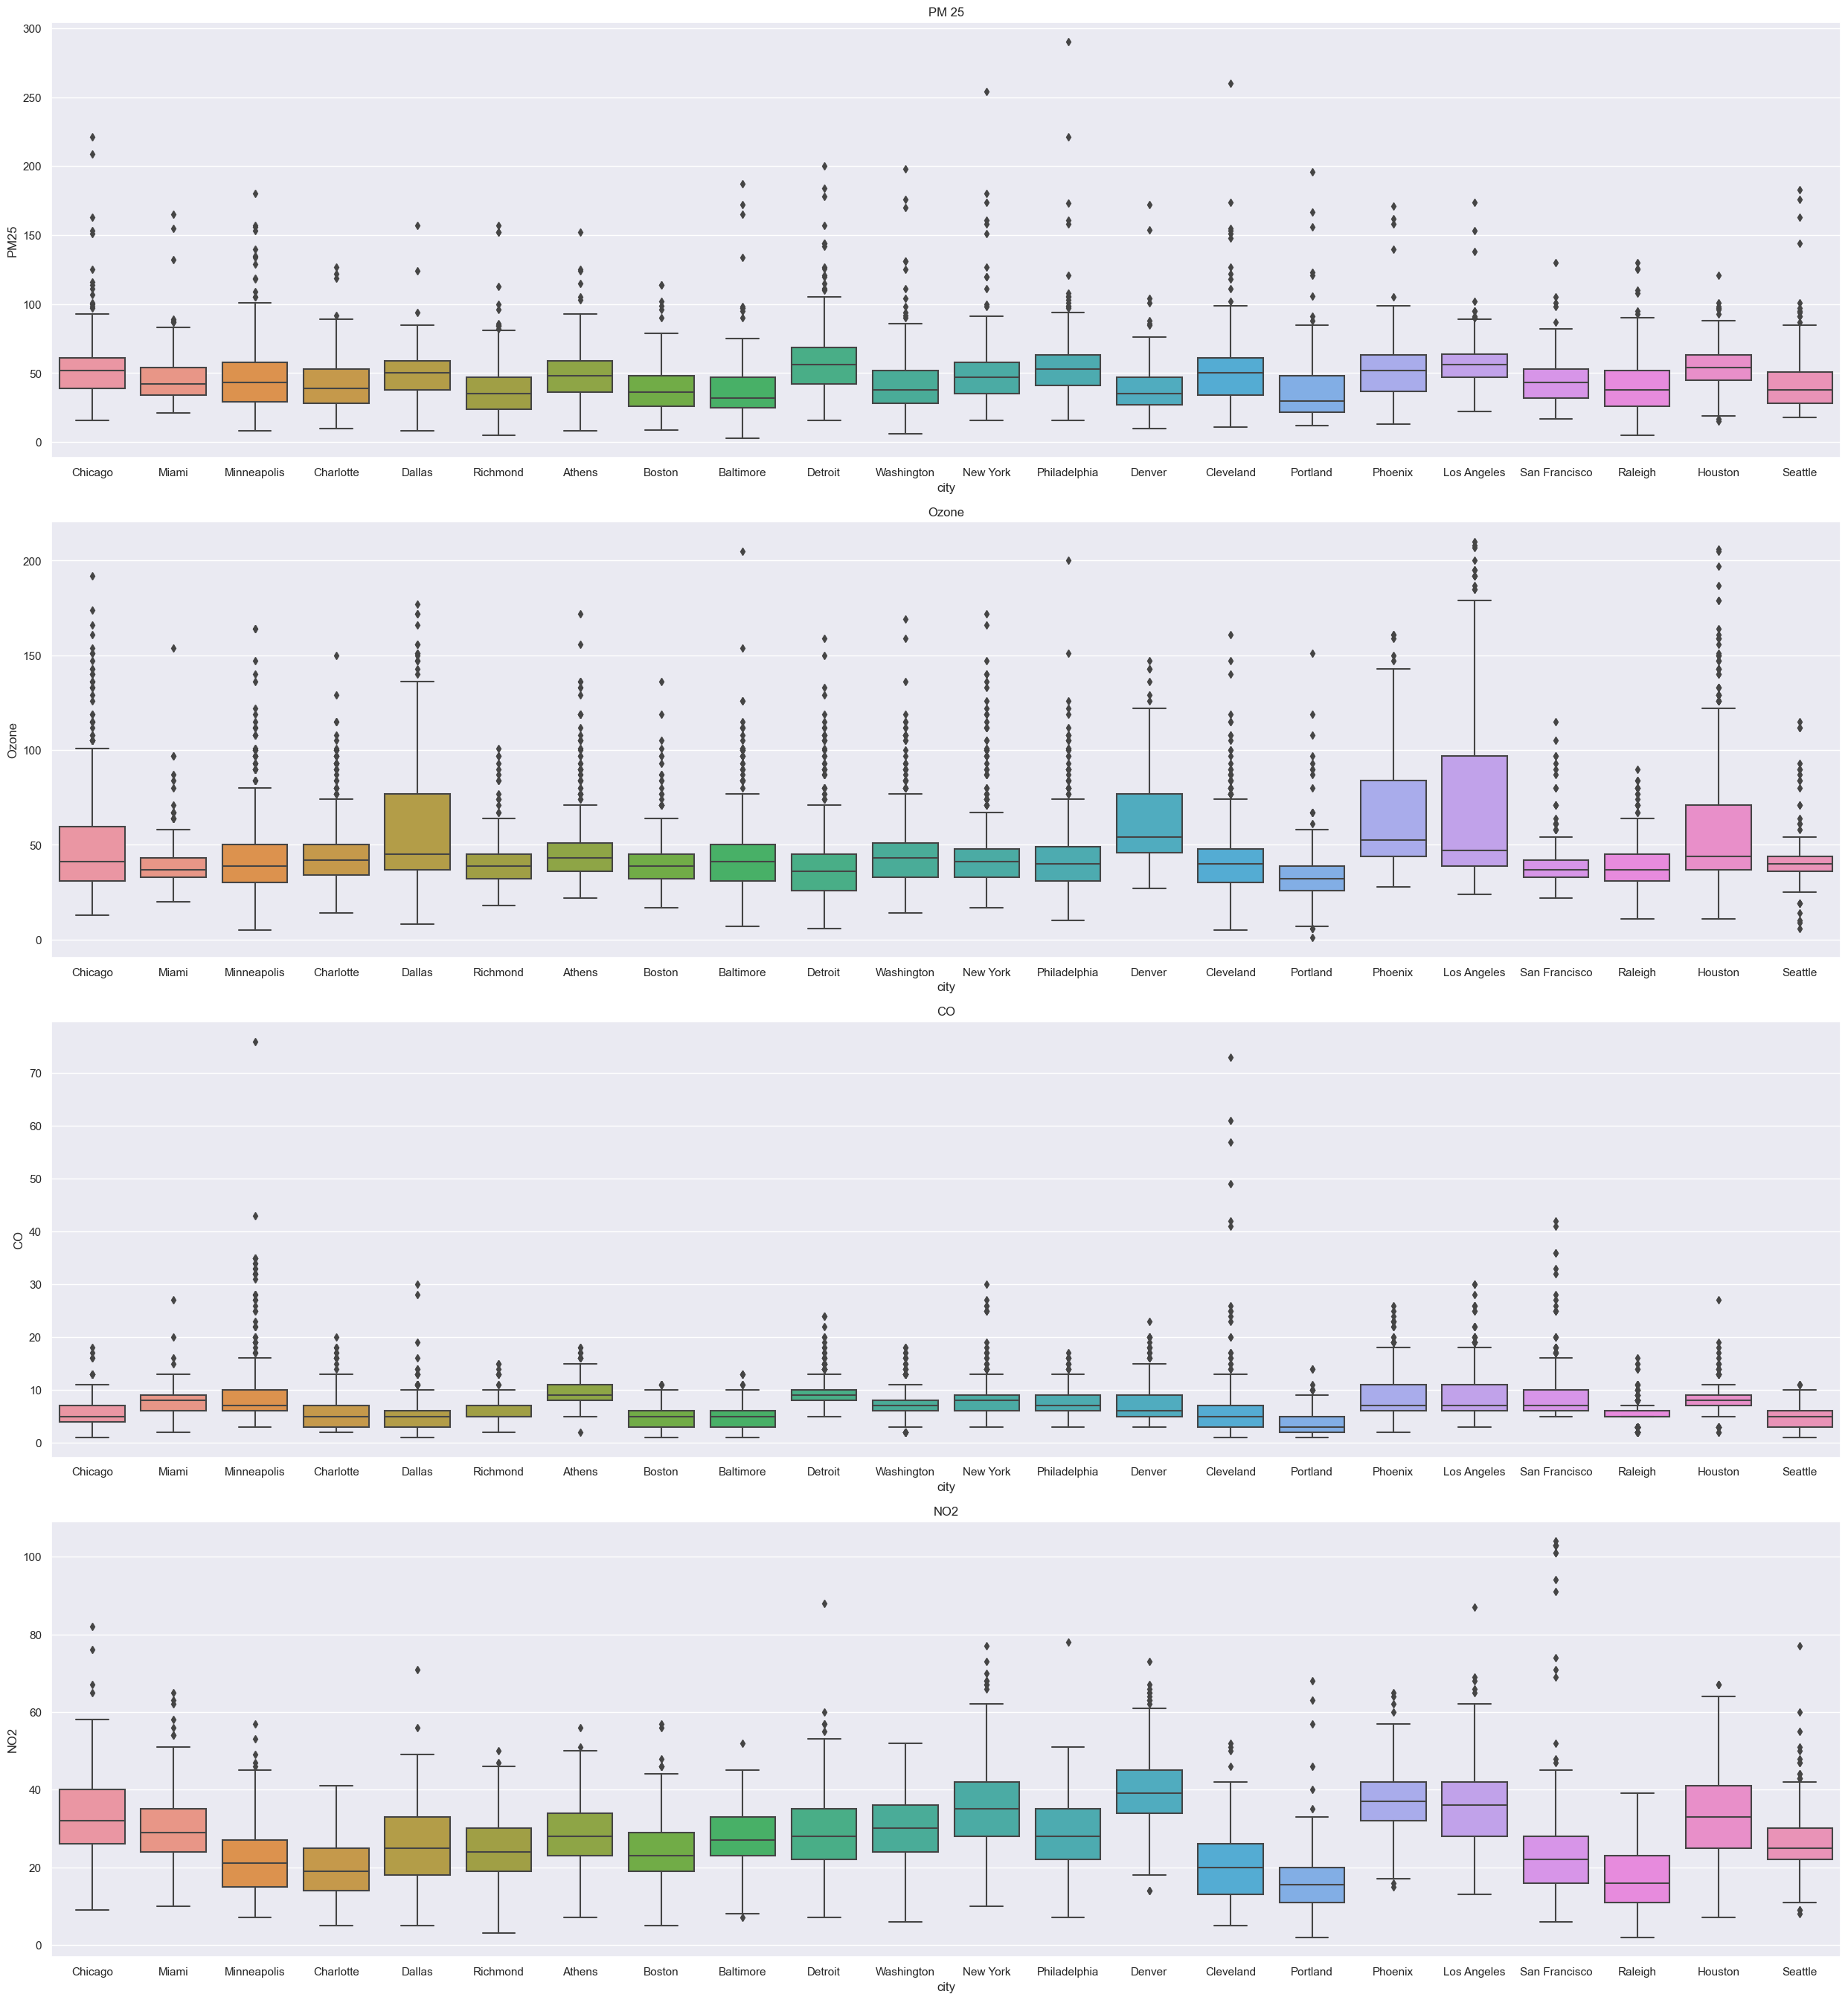

In [91]:
fig = plt.figure()
plt.figure(figsize=(25, 40))

plt.subplot(6, 1, 1)
sns.boxplot(x=airquality["city"], y=airquality["PM25"])
plt.title('PM 25')


plt.subplot(6, 1, 2)
sns.boxplot(x=airquality["city"], y=airquality["Ozone"])

plt.title('Ozone')

plt.subplot(6, 1, 3)
sns.boxplot(x=airquality["city"], y=airquality["CO"])

plt.title('CO')

plt.subplot(6, 1, 4)
sns.boxplot(x=airquality["city"], y=airquality["NO2"])

plt.title('NO2')


plt.tight_layout()


plt.show()


## Which months had the 3 highest averages of pollutants?

In [92]:
airquality.groupby('month')[['PM25']].mean().sort_values(
    by='PM25', 
    ascending=False
).head(3)

,PM25
month,
6,61.366667
7,53.113069
8,48.618768


In [93]:
airquality.groupby('month')[['Ozone']].mean().sort_values(
    by='Ozone', 
    ascending=False
).head(3)

,Ozone
month,
6,67.286364
7,66.671072
8,60.555718


In [94]:
airquality.groupby('month')[['NO2']].mean().sort_values(
    by='NO2', 
    ascending=False
).head(3)

,NO2
month,
2,31.837662
11,30.177812
3,30.054252


In [95]:
airquality.groupby('month')[['CO']].mean().sort_values(
    by='CO', 
    ascending=False
).head(3)

,CO
month,
12,8.764793
11,8.306991
10,7.450147


In [96]:
airquality.groupby('month')[['Overall AQI Value']].mean().sort_values(
    by='Overall AQI Value', 
    ascending=False
).head(3)

,Overall AQI Value
month,
6,79.272727
7,73.967695
8,67.671554


By grouping the dataset by month, we can see the average pollutant values for each month. After sorting the dataframe in descending order, we extract the top 3 rows to get the 3 months with the highest averages for each pollutant:
- `PM 25`: June, July, August
- `Ozone`: June July, August
- `NO2`: February, November, March
- `CO`: December, November, October
- `Overall AQI Value`: June, July, August

It seems that `PM 25` and `Ozone` have the highest averages in the summer months (also consistent with the `Overall AQI value`), while `NO2` and `CO` have the highest averages in the winter months with slight extension into fall and spring. 